In [1]:
import numpy as np
import pandas as pd

In [2]:
positive = pd.read_csv('positive_2024.csv')
positive["CME"] = 1
negative = pd.read_csv('negative_2024.csv')
negative["CME"] = 0

In [3]:
data = pd.concat([positive, negative], ignore_index=True)

In [4]:
data

,Unnamed: 0,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,...,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH,HARPNUM,NOAA,Class,Peak Time,CME
0,0,2.246101e+22,107.736,0.021724,15533.100,54.882,2975.118,77.983,0.041413,59.541,...,7.077275e+23,50.329,945.314636,4.805,745.287,377,11158,X2.2,2011.02.14_01:56_TAI,1
1,1,2.235615e+22,93.863,-0.001943,10914.060,44.178,1636.710,56.639,-0.003942,50.680,...,4.733711e+23,43.479,961.502686,4.303,63.441,401,11166,M2.0,2011.03.06_14:30_TAI,1
2,2,6.039302e+22,91.233,0.007535,9912.353,29.044,4229.148,49.560,0.015028,41.150,...,1.074422e+24,35.873,1934.446167,4.865,615.008,393,11164,M3.7,2011.03.06_20:12_TAI,1
3,3,2.384940e+22,109.706,0.009620,3703.910,13.500,1505.331,47.602,0.030907,34.321,...,1.879337e+23,28.525,970.551636,3.971,367.530,637,11226,M2.5,2011.06.06_06:41_TAI,1
4,4,1.989983e+22,109.891,0.032849,12062.610,44.090,2547.054,73.681,0.079865,53.270,...,5.269515e+23,43.929,1259.099854,4.777,1080.528,750,11261,M6.0,2011.08.02_13:48_TAI,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,961,6.068721e+22,113.223,-0.018846,13089.460,33.902,6105.217,65.565,-0.032996,45.425,...,1.329793e+24,39.109,3663.961670,5.162,1441.706,12471,13936,M1.2,2024.12.29_17:30_TAI,0
1285,962,6.058633e+22,112.725,-0.019508,13116.960,34.317,6120.661,65.513,-0.034247,45.580,...,1.335375e+24,39.362,3655.612793,5.180,1495.448,12471,13936,M1.6,2024.12.29_17:42_TAI,0
1286,963,6.123191e+22,113.080,-0.018925,12900.890,33.518,6172.515,64.694,-0.033407,44.952,...,1.329003e+24,38.897,3638.466797,5.141,1467.962,12471,13936,M1.6,2024.12.29_18:24_TAI,0
1287,964,6.116673e+22,112.701,-0.018793,12799.770,33.124,6156.305,64.452,-0.033052,44.773,...,1.313741e+24,38.692,3631.264404,5.179,1452.327,12471,13936,M1.7,2024.12.29_18:33_TAI,0


## Plotting histograms to see the variability of the data

In [5]:
data = data.drop(['Unnamed: 0','HARPNUM','NOAA','Class','Peak Time'], axis=1)

In [6]:
X = data.drop(columns=['CME'])
y = data['CME']

In [7]:
from sklearn.preprocessing import MinMaxScaler

def normalize_the_data(data):
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data)
    return normalized_data

xn = normalize_the_data(X)

In [8]:
columns = ['USFLUX', 'MEANGBT', 'MEANJZH', 'MEANPOT', 'SHRGT45', 'TOTUSJH',
       'MEANGBH', 'MEANALP', 'MEANGAM', 'MEANGBZ', 'MEANJZD', 'TOTUSJZ',
       'SAVNCPP', 'TOTPOT', 'MEANSHR', 'AREA_ACR', 'R_VALUE', 'ABSNJZH','CME']

df = pd.concat([pd.DataFrame(xn), pd.DataFrame(y)], axis=1)
df.columns = columns

df

,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,MEANGBZ,MEANJZD,TOTUSJZ,SAVNCPP,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH,CME
0,0.085807,0.561371,0.690394,0.516197,0.871939,0.157353,0.753790,0.678962,0.937815,0.588089,0.563836,0.139197,0.088958,0.133011,0.895704,0.086080,0.828163,0.164015,1
1,0.085390,0.406908,0.507880,0.354357,0.699841,0.084231,0.451634,0.462796,0.712539,0.386897,0.581791,0.090623,0.024879,0.088537,0.708633,0.087608,0.741641,0.013869,1
2,0.236685,0.377625,0.580972,0.319260,0.456517,0.225864,0.351421,0.553205,0.470255,0.396149,0.397570,0.213961,0.257581,0.202599,0.500915,0.179448,0.838504,0.135327,1
3,0.091329,0.583305,0.597047,0.101732,0.206602,0.077053,0.323702,0.628887,0.296639,0.515527,0.493177,0.084623,0.145808,0.034370,0.300243,0.088462,0.684419,0.080831,1
4,0.075619,0.585365,0.776187,0.394600,0.698426,0.133966,0.692889,0.862225,0.778385,0.569345,0.716803,0.118143,0.336367,0.098705,0.720922,0.115699,0.823337,0.237837,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,0.237855,0.622464,0.377520,0.430578,0.534624,0.328361,0.577995,0.324323,0.578939,0.686518,0.489594,0.261402,0.278063,0.251061,0.589289,0.342703,0.889693,0.317370,0
1285,0.237454,0.616919,0.372417,0.431541,0.541296,0.329204,0.577259,0.318358,0.582880,0.681493,0.497736,0.263169,0.288476,0.252120,0.596198,0.341915,0.892796,0.329205,0
1286,0.240022,0.620872,0.376915,0.423971,0.528450,0.332037,0.565665,0.322364,0.566914,0.685338,0.482562,0.264392,0.269589,0.250911,0.583499,0.340297,0.886074,0.323152,0
1287,0.239762,0.616652,0.377935,0.420428,0.522115,0.331152,0.562239,0.324053,0.562363,0.681515,0.532837,0.263142,0.263150,0.248014,0.577901,0.339617,0.892623,0.319709,0


In [9]:
pos = df[df['CME'] == 1]
neg = df[df['CME'] == 0]

## ANALYSIS

In [10]:
from sklearn.feature_selection import f_classif
from sklearn.datasets import make_classification

X = df.drop(columns=['CME'])
y = df['CME']

from sklearn.feature_selection import SelectKBest, f_classif

N_features = 18
a = np.array(X)
b = np.array(y)

selector = SelectKBest(f_classif, k=N_features)
selector.fit(a,b)
scores = selector.scores_
print(scores)

[1.26047003e+01 2.09908986e+00 5.27309334e+00 1.29967479e+01
 5.68349972e+00 2.37879696e+01 1.26333099e+01 7.57706085e+00
 4.93615075e+00 7.27577593e+00 1.37903598e+00 1.96258847e+01
 7.15396693e-03 2.55086119e+01 5.39756742e+00 1.49937919e+01
 1.52254359e+01 5.69675893e-01]


In [11]:
scaler = MinMaxScaler()
normalized_scores = scaler.fit_transform(scores.reshape(-1, 1)).flatten()

print(normalized_scores)

[0.49399318 0.08203201 0.20649562 0.50936672 0.22258907 0.93252769
 0.49511506 0.29684212 0.19328294 0.2850277  0.05379622 0.76931801
 0.         1.         0.21137668 0.58767769 0.59676125 0.02205842]


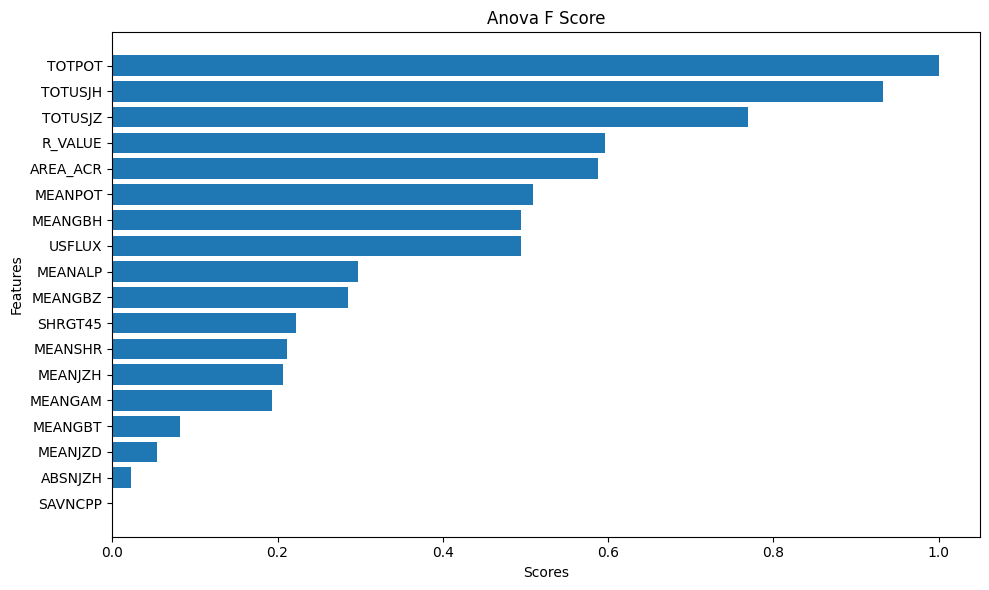

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

feature_names = X.columns
scores_df = pd.DataFrame({'Feature': feature_names, 'Score': normalized_scores}).sort_values('Score', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(scores_df['Feature'], scores_df['Score'])
plt.xlabel('Scores')
plt.ylabel('Features')
plt.title('Anova F Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

ordered_features = scores_df['Feature'].tolist()
ordered_features.append("CME")

In [13]:
df_reordered = df.loc[:, ordered_features]

In [14]:
df_reordered

,TOTPOT,TOTUSJH,TOTUSJZ,R_VALUE,AREA_ACR,MEANPOT,MEANGBH,USFLUX,MEANALP,MEANGBZ,SHRGT45,MEANSHR,MEANJZH,MEANGAM,MEANGBT,MEANJZD,ABSNJZH,SAVNCPP,CME
0,0.133011,0.157353,0.139197,0.828163,0.086080,0.516197,0.753790,0.085807,0.678962,0.588089,0.871939,0.895704,0.690394,0.937815,0.561371,0.563836,0.164015,0.088958,1
1,0.088537,0.084231,0.090623,0.741641,0.087608,0.354357,0.451634,0.085390,0.462796,0.386897,0.699841,0.708633,0.507880,0.712539,0.406908,0.581791,0.013869,0.024879,1
2,0.202599,0.225864,0.213961,0.838504,0.179448,0.319260,0.351421,0.236685,0.553205,0.396149,0.456517,0.500915,0.580972,0.470255,0.377625,0.397570,0.135327,0.257581,1
3,0.034370,0.077053,0.084623,0.684419,0.088462,0.101732,0.323702,0.091329,0.628887,0.515527,0.206602,0.300243,0.597047,0.296639,0.583305,0.493177,0.080831,0.145808,1
4,0.098705,0.133966,0.118143,0.823337,0.115699,0.394600,0.692889,0.075619,0.862225,0.569345,0.698426,0.720922,0.776187,0.778385,0.585365,0.716803,0.237837,0.336367,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,0.251061,0.328361,0.261402,0.889693,0.342703,0.430578,0.577995,0.237855,0.324323,0.686518,0.534624,0.589289,0.377520,0.578939,0.622464,0.489594,0.317370,0.278063,0
1285,0.252120,0.329204,0.263169,0.892796,0.341915,0.431541,0.577259,0.237454,0.318358,0.681493,0.541296,0.596198,0.372417,0.582880,0.616919,0.497736,0.329205,0.288476,0
1286,0.250911,0.332037,0.264392,0.886074,0.340297,0.423971,0.565665,0.240022,0.322364,0.685338,0.528450,0.583499,0.376915,0.566914,0.620872,0.482562,0.323152,0.269589,0
1287,0.248014,0.331152,0.263142,0.892623,0.339617,0.420428,0.562239,0.239762,0.324053,0.681515,0.522115,0.577901,0.377935,0.562363,0.616652,0.532837,0.319709,0.263150,0


In [15]:
pos = df_reordered[df_reordered['CME'] == 1]
neg = df_reordered[df_reordered['CME'] == 0]

In [16]:
min_a = pos.index.min()
max_a = pos.index.max()

pos['normalized_event_number'] = (pos.index - min_a) / (max_a - min_a)

min_b = neg.index.min()
max_b = neg.index.max()

neg['normalized_event_number'] = (neg.index - min_b) / (max_b - min_b)

/tmp/ipykernel_7730/2878712047.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos['normalized_event_number'] = (pos.index - min_a) / (max_a - min_a)
/tmp/ipykernel_7730/2878712047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg['normalized_event_number'] = (neg.index - min_b) / (max_b - min_b)


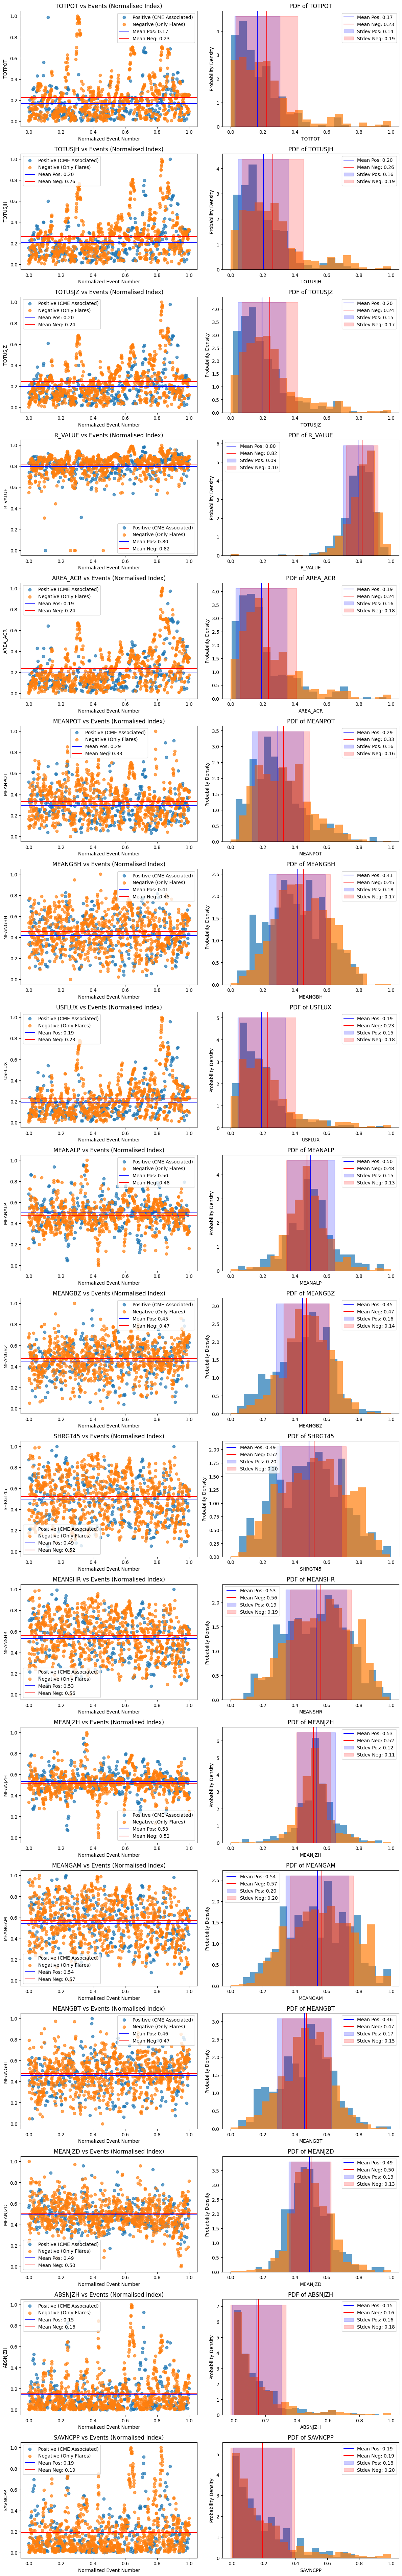

In [17]:
import numpy as np
import matplotlib.pyplot as plt

a = 1
plt.figure(figsize=(12, 80))

for i in range(len(columns) - 1):
    mean_pos = np.mean(pos.iloc[:, i])
    mean_neg = np.mean(neg.iloc[:, i])
    std_pos = np.std(pos.iloc[:,i])
    std_neg = np.std(neg.iloc[:,i])

    plt.subplot(len(columns), 2, a)
    plt.scatter(pos["normalized_event_number"], pos.iloc[:, i], alpha=0.7, label="Positive (CME Associated)")
    plt.scatter(neg["normalized_event_number"], neg.iloc[:, i], alpha=0.7, label="Negative (Only Flares)")
    plt.axhline(mean_pos, color='b', label=f"Mean Pos: {mean_pos:.2f}")
    plt.axhline(mean_neg, color='r', label=f"Mean Neg: {mean_neg:.2f}")
    plt.xlabel("Normalized Event Number")
    plt.ylabel(ordered_features[i])
    plt.title(f"{ordered_features[i]} vs Events (Normalised Index)")
    plt.legend()

    plt.subplot(len(columns), 2, a + 1)
    plt.hist(pos.iloc[:, i], bins=20, density=True, alpha=0.7)
    plt.hist(neg.iloc[:, i], bins=20, density=True, alpha=0.7)
    plt.axvline(mean_pos, color='b', label=f"Mean Pos: {mean_pos:.2f}")
    plt.axvline(mean_neg, color='r', label=f"Mean Neg: {mean_neg:.2f}")
    ymin, ymax = plt.ylim()
    plt.fill_betweenx([ymin, ymax], mean_pos - std_pos, mean_pos + std_pos, color='b', alpha=0.2,label=f'Stdev Pos: {std_pos:.2f}')
    plt.fill_betweenx([ymin, ymax], mean_neg - std_neg, mean_neg + std_neg, color='r', alpha=0.2, label=f'Stdev Neg: {std_neg:.2f}')
    plt.xlabel(ordered_features[i])
    plt.ylabel('Probability Density')
    plt.title(f'PDF of {ordered_features[i]}')
    plt.legend()

    a += 2

plt.tight_layout()
plt.savefig("2024_parameters_pdf.jpeg")
plt.show()